## Milestone 2
Link to the live webpage: https://dungngotan99.github.io/

### Possible sources of data
1. Boston Airbnb open data (Kaggle): https://www.kaggle.com/airbnb/boston
2. Washintgon Airbnb open data (data.world): https://data.world/codefordc/airbnb-washington-d-c-2015-10-03
3. San Francisco Airbnb open data (data.world): https://data.world/ajsanne/sf-airbnb-listings
4. New York Airbnb open data (Kaggle): https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

### Project Plan
Since the first time Airbnb was established in 2008, its appearance has disrupted and changed the traditional ways of hospitality and acoomodation around the world. The number of rental listings on Airbnb has expanded exponentially over the past few years. Based on the motivation to understand its explosive growth and operation thoroughly, this project wiil extract data from websites, manipulate it, run exploratory analysis on procesed one, apply machine learning models to do so. Besides, in the stance of owners, I will try to answer more questions as many as possible to help hosts have the clearest view of Airbnb company and how to strategize their business. Indeed, the project will explore how Airbnb in different cities affect how owners run their business as hosts and how customers will feel and speed their money on Airbnb houses. Finally, with all insights I collect, possible ideas will be suggested to help owners to choose the best options they need.

The project will try to draw a comprehensive picture of Airbnb listings in New York City and then compare its with those of other cities, such as San Francisco or Boston.

### Questions
In details, the project will understand how the locations of these accomodations, ranges of time customers are likely to travel (supply and demand principle), and other reasons may affect the price, ratings, and number of listings. Furthermore, customers' reviews play an important roles in improving customer service, which may help the company run advertisement for suitable targets and connect customers or hosts with same interests. Thus, I want to explore how these reviews can be extracted and briefly identify some characteristics of customers to personalize their experiences.

Further questions:
1. Is there any correlation between price and number of reviews, rating scores, host response rate, or number of bedrooms of a house?
2. What is the price distribution of Airbnb listings
3. Which locations in NYC have the highest price and rating scores?
4. What are the popular room types and house types in NYC? 
5. What time of the year are AirBnBs most popular in New York City? Are specific holiday seasons more popular?
6. Can we predict the price of an house given several features? Which kind of model will we use to predict the most accurately?
7. What can we understand from the customers' reviews? What changes should we make to make them happier?
8. How do NYC Airbnb listings compare with Boston or San Francisco's ones?

### Possible tools
Python libraries: 
    1. Data extraction and manipulation: numpy, pandas
    2. Data visualization: plotly, seaborn, ipywidgets, and matplotlib
    3. Data analysis: scipy and scikit-learn
Others:
    Natural language processing (NLP) and linear regression.

## Import necessary libraries and set up the environment

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sb
from pygal import *
from ipywidgets import *
import geopandas
from shapely.geometry import Point, Polygon
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from pandas.plotting import register_matplotlib_converters
from ipywidgets.embed import embed_minimal_html
register_matplotlib_converters()
sb.set()

# The adjustment below will widen the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Extraction & Data Warehousing
We load the datasets locally, and it consists of 3 cities in the U.S, include Boston, New York, and San Francisco.
First of all, I will clean and explore more deeply New York datasets through graphs, statistics, and machine learning model. Later, I will compare it with the two remaining processed datasets. Also, I will take a look at the dimension of NY dataset for later analysis.

In [2]:
# Boston datasets
listing = "../Airbnb-Datasets/Boston/listings.csv"
boston_listings = pd.read_csv(listing)

# San Francisco datasets
listing = "../Airbnb-Datasets/San Francisco/San francisco.csv"
san_listings = pd.read_csv(listing)

# New York datasets
listing_kaggle = "../Airbnb-Datasets/New York/AB_NYC_2019.csv"
listing = "../Airbnb-Datasets/New York/airbnb-listings.csv"
ny_listing_kaggle = pd.read_csv(listing_kaggle)
ny_listings = pd.read_csv(listing, sep=';',low_memory=False)

print("NY dataset's dimension: %dx%d" % (ny_listings.shape))

NY dataset's dimension: 19528x89


## Data Cleaning

### Data Separation
If I look at the NY dataset's dimension, we could see that the see that it is huge and we should be happy about it! However, it comes with a dark side because it makes harder for me to remember and choose the best columns for data analysis. Therefore, I will divide this dataset into 6 sub-categories, including text, host, location, house, money, and review. Below are the information about each table.
1. text: include customers' reviews and general descriptions for each Airbnb listing. These are essential fuel for us to understand the customers more via Natural Language Processing (NLP). All columns are categorical.
2. host: include necessary information about each host. This column can help us analyze the hosts' performances and how it will correlate with other features, particulatly ones in "money" table. Columns are both numerical and categorical.
3. location: include information about location of each listing. This column is important for us to analyze price and review scores at specific location on map. Columns are both numerical and categorical.
4. house: include characteristics of each Airbnb listing. This table can help us see how its features are going to affect the price. Columns are both numerical and categorical.
5. money: include price and availability. This is interesting table since I will run linear regression model for multivariate variables and derive the hypothesis function to predict the renting price. Columns are all numerical.
6. review: include all kinds of rating scores. Similar to "host" table, I am going to understand how reviews influence the hosts' decision to set the price. Columns are both numerical and categorical.

In [3]:
#ny_listings = ny_listings.set_index("ID")
# Divide the dataset into 6 sub-categories, including text, host, location, house, money, and review 
# All shared same ID
text = ['Description','Summary','Experiences Offered', 'Neighborhood Overview', 'Notes']

host = ['Host ID', 'Host Since', 'Host Location', 'Host About','Host Listings Count',
        'Host Response Time', 'Host Response Rate','Host Verifications']

location = ['Street', 'Neighbourhood', 'City','State', 'Zipcode', 'Market','Neighbourhood Group Cleansed',
            'Neighbourhood Cleansed','Smart Location', 'Country Code','Country', 'Latitude', 'Longitude']

house = ['Property Type', 'Room Type','Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 
         'Bed Type','Amenities', 'Square Feet','Calculated host listings count']

money = ['Price', 'Weekly Price', 'Monthly Price', 'Cleaning Fee', 'Availability 30', 
         'Availability 60','Availability 90', 'Availability 365']

review = ['Number of Reviews', 'First Review', 'Last Review','Review Scores Rating','Reviews per Month',
          'Review Scores Accuracy','Review Scores Cleanliness', 'Review Scores Checkin',
          'Review Scores Communication', 'Review Scores Location','Review Scores Value']

text_df, host_df, location_df = ny_listings[text].copy(), ny_listings[host].copy(), ny_listings[location].copy()
house_df, money_df, review_df = ny_listings[house].copy(), ny_listings[money].copy(), ny_listings[review].copy()

### Deal with missing data
Fortunately, the datasets I downloaded online are tidy and did not have any serious quality issues. However, if you skim over it, we can easily spot out the missing data. Thus, I will replace missing values with its mean for numerical values if the missing values account for more than 30% of their total elements. Otherwise, I will just drop them all. For categorical ones, I will fill missing data with "Not Provided" string if the missing values are more than 50% of total elements.

In [4]:
# Create a helper function to replace missing values 
def fill_missing(df):
    columns = df.columns.values
    for each in columns:
        column, name = df[each], df[each].name
        if column.dtypes == 'int64':
            miss_percent = column.isnull().sum()/len(column) > 0.3
            df.fillna(value={name:column.mean()},inplace=True) if miss_percent else df.dropna(subset=[each],inplace=True)

        elif column.dtypes == 'float64':
            miss_percent = column.isnull().sum()/len(column) > 0.3
            df.fillna(value={name:column.mean()},inplace=True) if miss_percent else df.dropna(subset=[each],inplace=True)

        elif column.dtypes == 'object':
            miss_percent = column.isnull().sum()/len(column) > 0.5
            df.fillna(value={name:'Not provided'},inplace=True) if miss_percent else df.dropna(subset=[each],inplace=True)
            
df_lists = [text_df, host_df, location_df, house_df, money_df, review_df]
for each in df_lists:
    fill_missing(each)

## Data Visualization

### Scatter Plot
First of all, I am interested in finding the correlation among features. For example, I want to see the correlation between number of reviews for each listing and its price or the host response rate and review scores rating by using scatter plot and critical lines.

In [5]:
# Display the Money dataframe
money_df.head()

Price  Weekly Price  Monthly Price  Cleaning Fee  Availability 30  Availability 60  Availability 90  Availability 365
1   290.0    622.563556    5900.000000          45.0                0                0                0                 0
4   110.0    622.563556    3438.245212          49.0                6               36               66                66
6   190.0    622.563556    3438.245212          79.0                0                1                4               125
7   149.0    622.563556    3438.245212          50.0                0               17               47                47
11  180.0    622.563556    3438.245212         125.0                8               28               54                59

In [6]:
# Display the Review dataframe
review_df.head()

Number of Reviews First Review Last Review  Review Scores Rating  Reviews per Month  Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  Review Scores Communication  Review Scores Location  Review Scores Value
0                  3   2017-04-12  2017-04-24                 100.0               3.00                     9.0                        9.0                    9.0                          9.0                    10.0                 10.0
1                  9   2011-12-13  2016-11-30                 100.0               0.14                    10.0                       10.0                   10.0                         10.0                    10.0                 10.0
3                298   2017-02-23  2017-04-28                  99.0             125.92                    10.0                       10.0                   10.0                         10.0                    10.0                 10.0
4                  1   2016-11-15  2016-11-15                 100.0               0.17                    10.0                       10.0                    8.0                         10.0                    10.0                 10.0
5                  1   2016-09-30  2016-09-30                  80.0               0.14                     8.0                        6.0                   10.0                         10.0                     8.0                  8.0

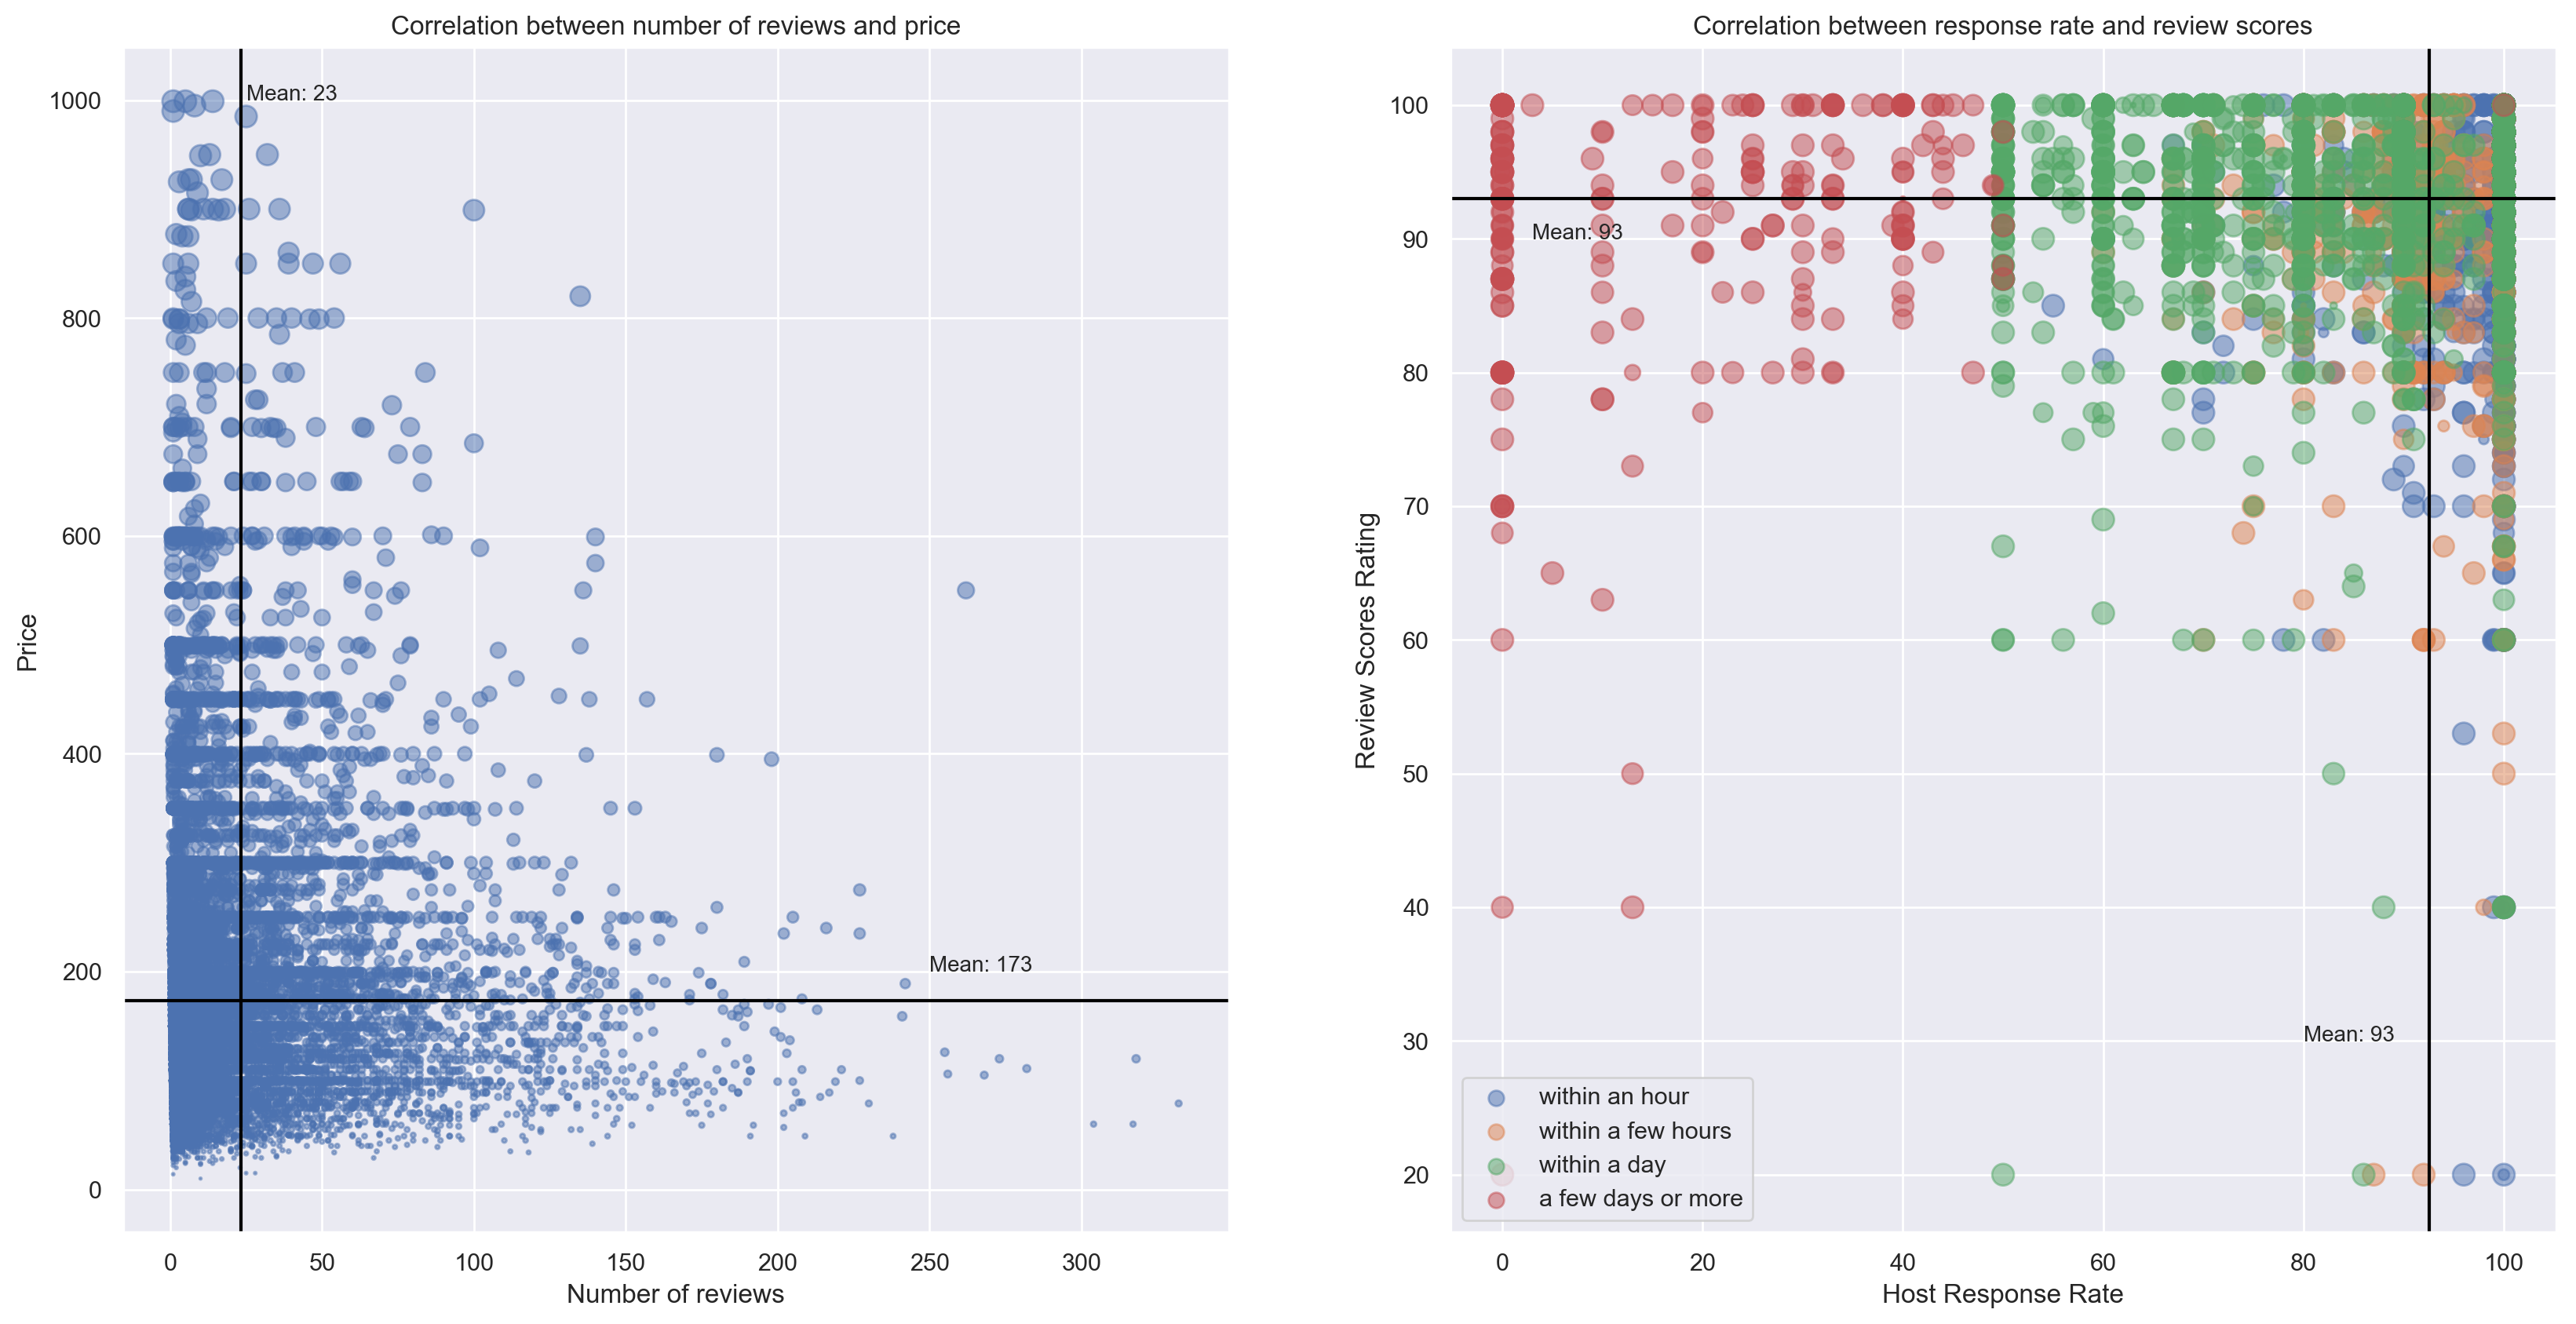

In [7]:
# Create a figure and 2 subplots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,10), dpi=200)
#Price and review per month
money_review = money_df.merge(review_df, how='inner', left_index=True, right_index=True)
axes[0].scatter('Number of Reviews','Price',data=money_review, s=money_review['Price']/10,c='b',alpha=0.5)
axes[0].set(xlabel='Number of reviews',ylabel='Price', title='Correlation between number of reviews and price')

#Annotate the axis lines with their means 
axes[0].axhline(money_review['Price'].mean(),c='black')
axes[0].text(250,200,'Mean: {}'.format(round(money_review['Price'].mean())))
axes[0].axvline(money_review['Number of Reviews'].mean(),c='black')
axes[0].text(25,1000,'Mean: {}'.format(round(money_review['Number of Reviews'].mean())))

#Host response rate and review scores rating
host_review = host_df.merge(review_df, how='inner', left_index=True, right_index=True)
for each in host_review['Host Response Time'].unique():
    data = host_review[host_review['Host Response Time'] == each]
    axes[1].scatter('Host Response Rate','Review Scores Rating',data=data,
                      label=each,s=host_review['Host Response Rate'],alpha=0.5)
axes[1].set(xlabel='Host Response Rate',ylabel='Review Scores Rating', 
              title='Correlation between response rate and review scores')

#Annotate the axis lines with their means 
axes[1].axhline(host_review['Review Scores Rating'].mean(),c='black')
axes[1].text(3,90,'Mean: {}'.format(round(host_review['Review Scores Rating'].mean())))
axes[1].axvline(host_review['Host Response Rate'].mean(),c='black')
axes[1].text(80,30,'Mean: {}'.format(round(host_review['Host Response Rate'].mean())))

# Add the legend to the second subplot
plt.legend();

#### Analysis
For the first subplot, the data points cluster around the intersection between means of both number and reviews and price. This may indicate that when the price is low, there are more number of listings, which seems logical due to the law of supply and demand. Also, we can see that there are many data points that go along its mean axis, which may demonstrate that the price or the number of reviews are not affected by another factor. Also, the plot also gives us information about the average price and number of reviews of Airbnb in NYC.

For the second subplot, we could easily see that there are two distinctive cluster of host response rate, include those of who will response a fews days or more and those of the remaining. We may think that a host who responds late may receive low score rating but it may be not true in this case where hosts responding a few days or more have as high rating score as those responding within a day or sooner. Therefore, host response rate may not affect the review score rating. Finally, the plot also gives us informtion about the average host response rate and review scores rating.

### Joint Plot
Next step, I am going to focus on how other features affect the price. For instance, the plot below shows the correlation between number of rooms and price.

In [8]:
# Display the House Dataframe
house_df.head()
# Note: the Money DataFrame is displayed in Scatter plot section

Property Type        Room Type  Accommodates  Bathrooms  Bedrooms  Beds  Bed Type                                          Amenities  Square Feet  Calculated host listings count
0     Apartment  Entire home/apt             3        1.0       1.0   2.0  Real Bed  TV,Cable TV,Wireless Internet,Kitchen,Smoking ...   730.259109                               1
1     Apartment  Entire home/apt             2        0.0       1.0   1.0  Real Bed  TV,Internet,Wireless Internet,Air conditioning...   730.259109                               1
2     Apartment     Private room             1        1.0       1.0   1.0  Real Bed  Wireless Internet,Kitchen,Smoking allowed,Heat...   730.259109                               1
3          Loft     Private room             5        1.0       1.0   3.0  Real Bed  TV,Cable TV,Internet,Wireless Internet,Air con...   730.259109                               1
4     Apartment     Private room             1        1.0       1.0   1.0  Real Bed  TV,Wireless Internet,Air conditioning,Kitchen,...   730.259109                               1

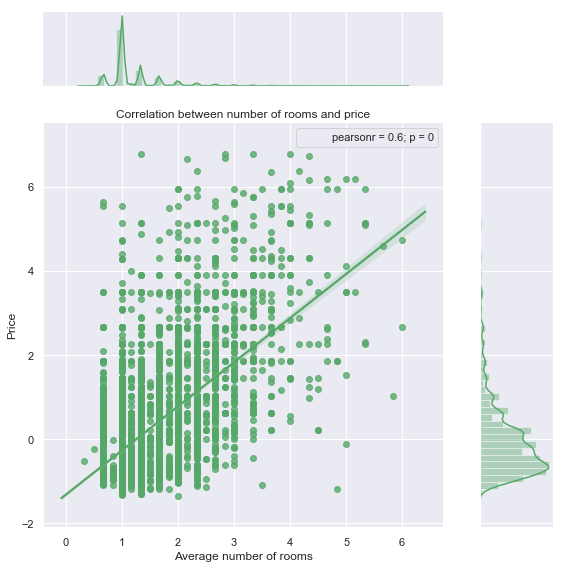

In [31]:
# Average number of rooms and price
house_money = house_df.merge(money_df, how='inner', left_index=True, right_index=True)
house_money['Average rooms'] = house_money[['Bathrooms','Bedrooms','Beds']].mean(axis=1)
std_price = (house_money['Price'] - house_money['Price'].mean()) / house_money['Price'].std()
house_money['Std Price'] = std_price

join = sb.jointplot('Average rooms','Std Price', data=house_money,
                    kind='reg', height=8, ratio=4, color='g',space=0.5)
join = join.annotate(stat.pearsonr)
plt.gca().set(xlabel="Average number of rooms", ylabel='Price',
              title='Correlation between number of rooms and price');

#### Analysis
According to the plot above, we could see that there is a good correlation between number of rooms and price as what we expected. It also shows that the price distribution is skewed to the left, indicating that the mean price is higher than the median one. The mean price may be affected by some outliers that are extremely high, which is fair enough for one of the most expensive cities in the world. Besides, the majority of NYC Airbnb listings has 1 room, which make sense for one of the most populous cities around the world.

### Box plot
This plot shows the distribution of price of several areas in NYC.

In [10]:
# Display the Location DataFrame
location_df.head()
# Note: the Money DataFrame is displayed in Scatter plot section

Street     Neighbourhood      City State Zipcode    Market Neighbourhood Group Cleansed Neighbourhood Cleansed Smart Location Country Code        Country   Latitude  Longitude
0  Long Island City, New York, NY 10021, United S...  Long Island City  New York    NY   10021  New York                       Queens       Long Island City   New York, NY           US  United States  40.746234 -73.956953
1  Lower East Side, New York, NY 10002, United St...   Lower East Side  New York    NY   10002  New York                    Manhattan        Lower East Side   New York, NY           US  United States  40.720780 -73.986421
2  Lower East Side, New York, NY 10002, United St...   Lower East Side  New York    NY   10002  New York                    Manhattan        Lower East Side   New York, NY           US  United States  40.720939 -73.983105
3  Lower East Side, New York, NY 10002, United St...   Lower East Side  New York    NY   10002  New York                    Manhattan        Lower East Side   New York, NY           US  United States  40.719212 -73.991159
4  Lower East Side, New York, NY 10002, United St...   Lower East Side  New York    NY   10002  New York                    Manhattan        Lower East Side   New York, NY           US  United States  40.720132 -73.983673

In [32]:
# Price distribution of each location (boxplot)
def function(x):
    location_money = location_df.merge(money_df, how='inner', right_index=True, left_index=True)
    location = location_money['Neighbourhood Cleansed'].value_counts()
    neighbor = location[location.values > x].copy()
    price_dist = {i:[0,[]] for i in neighbor.index.values}
    for each in neighbor.index.values:
        data = location_money[location_money['Neighbourhood Cleansed'] == each]['Price'].values
        price_dist[each][0], price_dist[each][1] = np.mean(data), data

    # Sort by the mean value of each distribution
    price_dist_sorted = sorted(price_dist.items(), key=lambda x: x[1][0])
    sorted_data = {price_dist_sorted[i][0]:price_dist_sorted[i][1][1] for i in range(len(price_dist))}
    plt.figure(figsize=(17,7), dpi=100)
    plt.boxplot(sorted_data.values(),showfliers=False,whis=2)
    plt.xticks(np.arange(1,len(sorted_data)+1),sorted_data.keys(),rotation=75);
    plt.gca().set(xlabel='Neighbourhoods',ylabel='Price', title='Distribution of price for several areas in NYC');

dropBox = Dropdown(options=list(np.arange(0,101,10)),value=10,description='The least number of listings')
interact(function, x=dropBox);

interactive(children=(Dropdown(description='The least number of listings', index=1, options=(0, 10, 20, 30, 40…

#### Analysis
We could see that mean, interquantile range, and range are generally increasing from Washington Heights to Fashion District. This does make sense because the center of NYC is Manhattan, which is the most populous area among other counties. Therefore, if you have any geographical knowledge about NY, then you could realize that any neighbor that falls into this area, such as Midtown, Soho, Fashion District, usually has a higher renting price. I will construct the NYC maps later to made it clearer for you to interpret. 

Also, I include the ipywidget to let user choose a number k to display the neighborhoods that have at least k number of listings. Unfornately, the users would not be able to interact with this widget when the file is converted to html. I suggest if you want to interact with the ipywidget, download my source code as ipynb file. 

### Map
This section will give you some interesting information about where the price and review scores of listings locates in NYC

In [12]:
# Display the Kaggle dataset
ny_listing_kaggle.drop(columns=['last_review','reviews_per_month']).head()

id                                              name  host_id    host_name neighbourhood_group neighbourhood  latitude  longitude        room_type  price  minimum_nights  number_of_reviews  calculated_host_listings_count  availability_365
0  2539                Clean & quiet apt home by the park     2787         John            Brooklyn    Kensington  40.64749  -73.97237     Private room    149               1                  9                               6               365
1  2595                             Skylit Midtown Castle     2845     Jennifer           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt    225               1                 45                               2               355
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632    Elisabeth           Manhattan        Harlem  40.80902  -73.94190     Private room    150               3                  0                               1               365
3  3831                   Cozy Entire Floor of Brownstone     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt     89               1                270                               1               194
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192        Laura           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt     80              10                  9                               1                 0

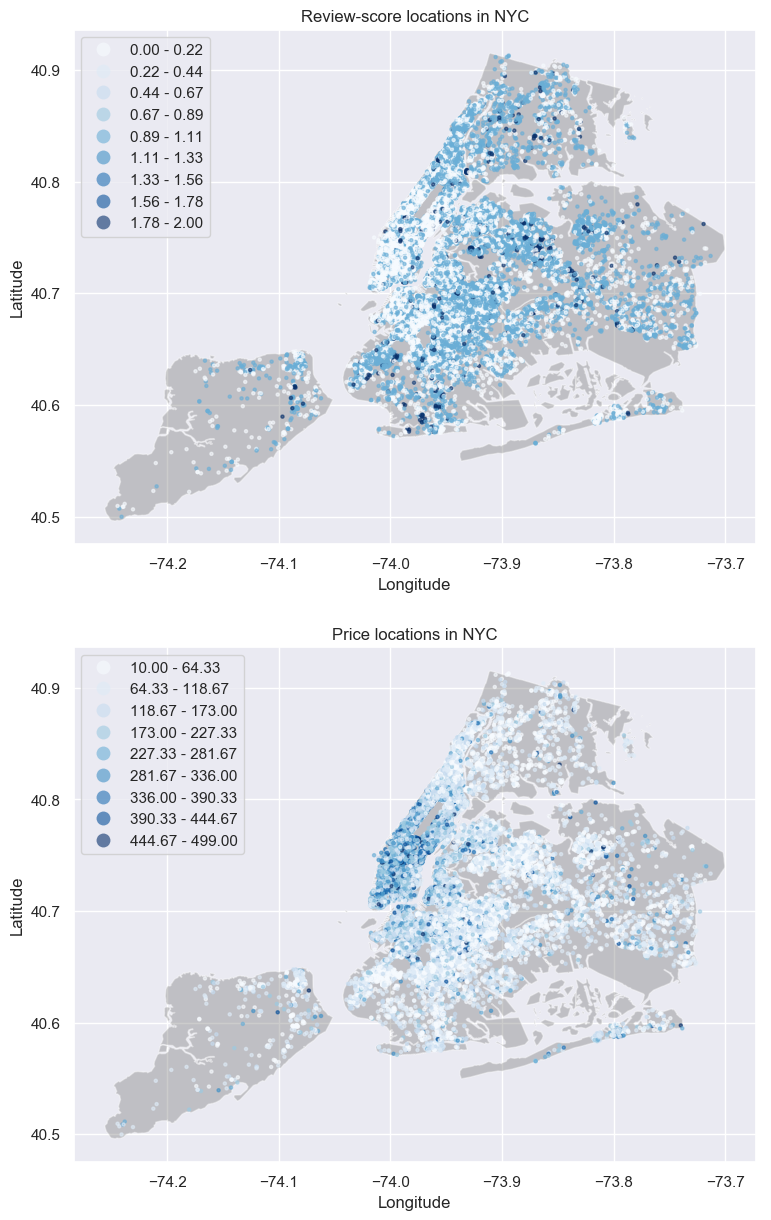

In [13]:
# Read the shape file, which returns the GeoDataFrame
path = "../Airbnb-Datasets/nyc_borough/nyc_boroughs.shp"
borough = geopandas.read_file(path)

# Convert longitude and latitude to Point object
# Pass all attribures, including crs and geometry, to GeoDataFrame
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(ny_listing_kaggle['longitude'],ny_listing_kaggle['latitude'])]
geo_df = geopandas.GeoDataFrame(ny_listing_kaggle, crs = crs, geometry = geometry).query('0 < price < 500')

# Create a subplot with 2 rows and 1 column
fig, ax = plt.subplots(2,1, figsize=(10,15), dpi=100)

# Plot the map of NYC on the first axes
borough.plot(ax=ax[0], alpha=0.4, color='grey')
# Plot the data points from GeoDataFrame with column "Review Scores Rating" as value
# Pass in parameters "scheme" and "k" to create intervals for legend
geo_df.plot(ax=ax[0], alpha=0.6, markersize=5, column='room_type', 
          cmap='Blues', scheme='equal_interval', k=9,legend=True, legend_kwds={'loc':'upper left'});
# Set the labels and title
ax[0].set(xlabel='Longitude',ylabel='Latitude',title='Review-score locations in NYC')

# Plot the map of NYC on the second axes
borough.plot(ax=ax[1], alpha=0.4, color='grey')
# Plot the data points from GeoDataFrame with column "Price" as value
# Pass in parameters "scheme" and "k" to create intervals for legend
geo_df.plot(ax=ax[1], alpha=0.6, column='price', cmap='Blues', 
          markersize=5, scheme='equal_interval', k=9,legend=True, legend_kwds={'loc':'upper left'})
# Set the labels and title
ax[1].set(xlabel='Longitude',ylabel='Latitude',title='Price locations in NYC');

#### Analysis

In this map, we will explore the location of room types and price in NYC by using the Kaggle dataset. For the map of room type, private room, entire home/apt, and shared room are encoded as 0,1, and 2, respectively. Since I do not know how to adjust the legend so I think it is better to mention the legend here for clarity. Private rooms appears the most in lower Manhattan area; entire home/apt appears the most in upper Manhattan, Queens, and Brooklyn; shared rooms are distributed evenly in NYC.

For the map of price, we will only deal with observations whose price is in range from 0 to 500 dollars, since there are some extreme outliers that affect our analysis. we could see that the prices are higher in lower and mid Manhattan and lower when they move to upper Manhattan, which makes sense because the lower areas are the hub of financial centers and headquarters, particularly Wall Street.

#### Bar Chart
After we know some interesting pieces of geographical information of NYC Airbnb listings related to price and review scores, we explore some information about their property. In this plot, we will look at how many number of listings there are for each type of room. Based on that, we will see how the price distributes given the room type and property type

In [14]:
# Display the House DataFrame
house_df.head()
# Note: the Money DataFrame is displayed in Scatter plot section

Property Type        Room Type  Accommodates  Bathrooms  Bedrooms  Beds  Bed Type                                          Amenities  Square Feet  Calculated host listings count
0     Apartment  Entire home/apt             3        1.0       1.0   2.0  Real Bed  TV,Cable TV,Wireless Internet,Kitchen,Smoking ...   730.259109                               1
1     Apartment  Entire home/apt             2        0.0       1.0   1.0  Real Bed  TV,Internet,Wireless Internet,Air conditioning...   730.259109                               1
2     Apartment     Private room             1        1.0       1.0   1.0  Real Bed  Wireless Internet,Kitchen,Smoking allowed,Heat...   730.259109                               1
3          Loft     Private room             5        1.0       1.0   3.0  Real Bed  TV,Cable TV,Internet,Wireless Internet,Air con...   730.259109                               1
4     Apartment     Private room             1        1.0       1.0   1.0  Real Bed  TV,Wireless Internet,Air conditioning,Kitchen,...   730.259109                               1

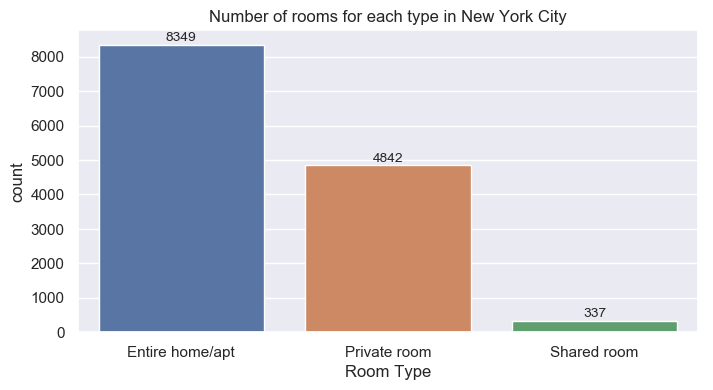

In [15]:
# Can use a bar chart: in each chart (neighbourhood: Manhattan, Brooklyn,Queens)
# display the number of counts of every room type -> Each chart has 3 sub-columns (entire, private, shared)
plt.figure(figsize=(8,4), dpi=100)
room_counts = house_money['Room Type'].value_counts()
sb.countplot(x='Room Type',data=house_money)
plt.title("Number of rooms for each type in New York City")
for index,value in enumerate(room_counts.values):
    plt.annotate(value,(index,value+100),ha='center');

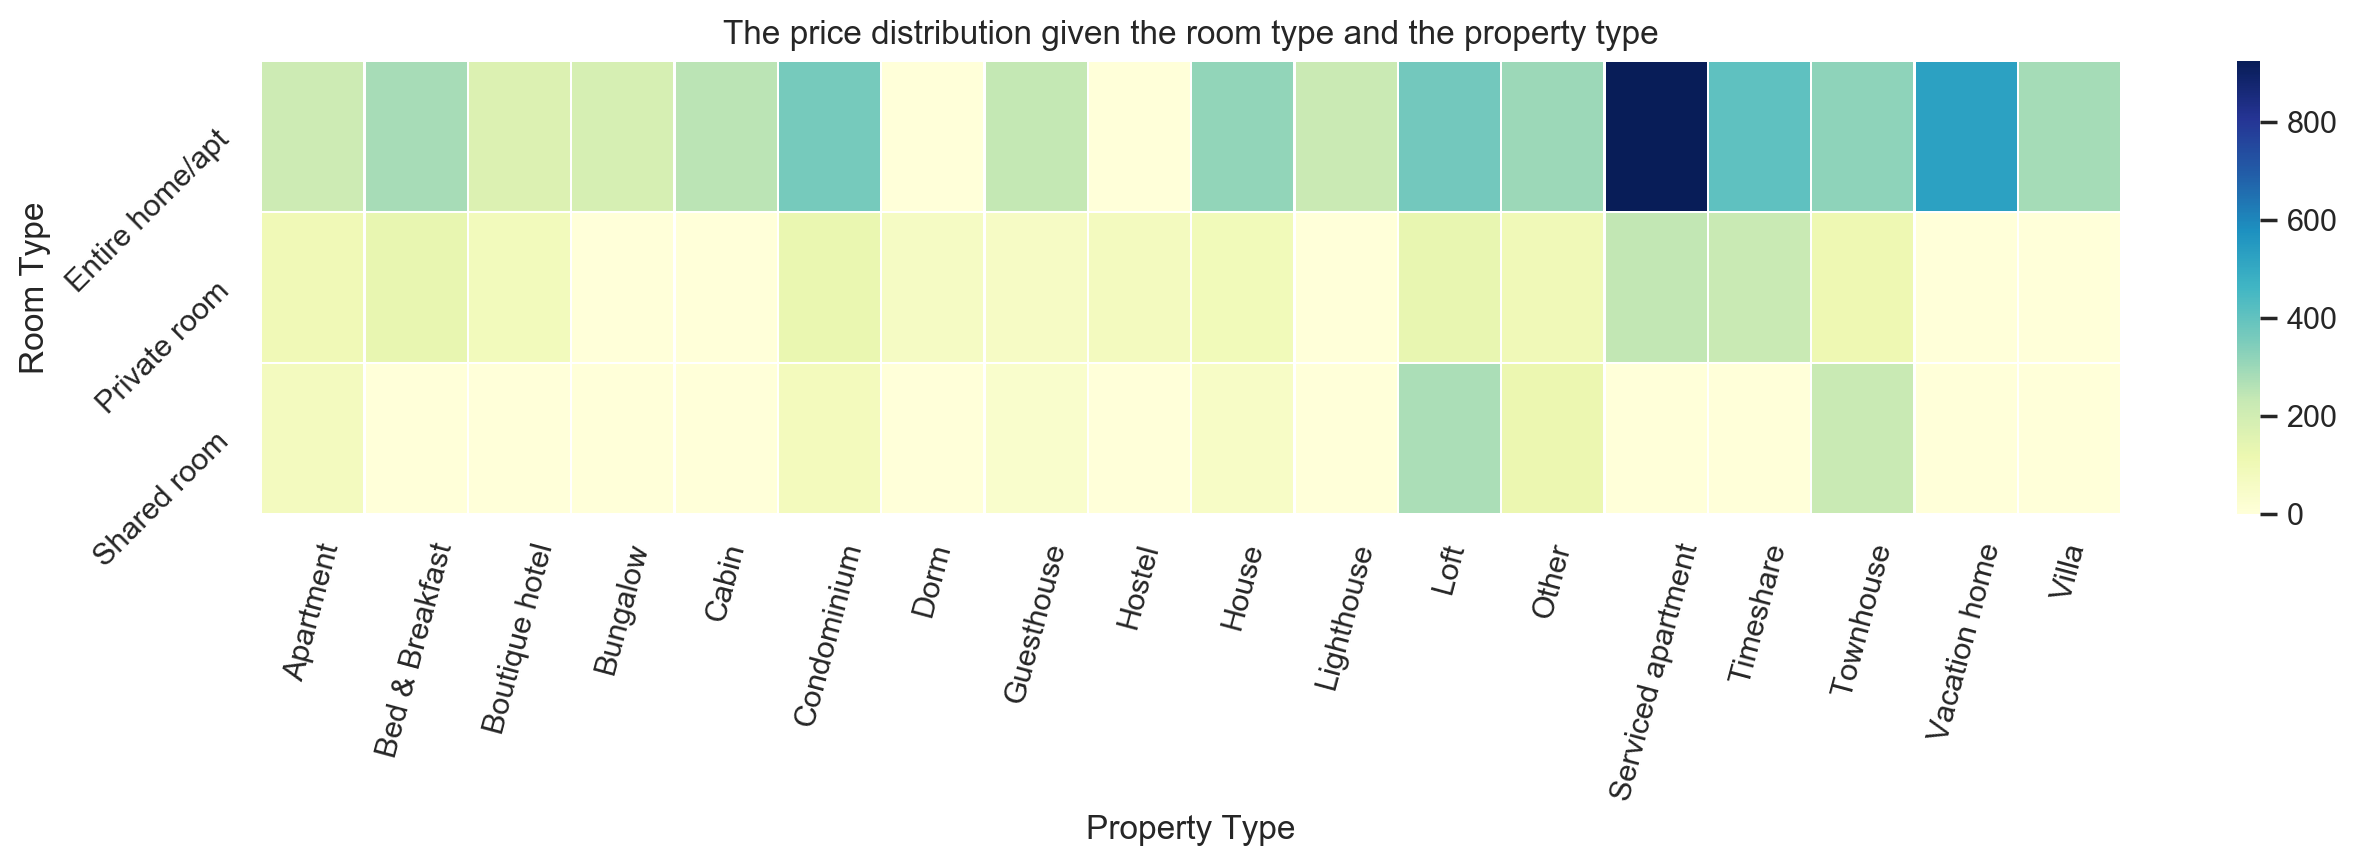

In [16]:
# Number of property type in each location (bar-chart)
plt.figure(figsize=(15,3), dpi=200);
property_type, room_type, price = house_money['Property Type'], house_money['Room Type'], house_money['Price']
table = pd.pivot_table(house_money,columns='Property Type',index='Room Type',values='Price',aggfunc=np.mean).fillna(0)
sb.heatmap(table, linewidths=0.5, cmap='YlGnBu')
plt.xticks(rotation=75), plt.yticks(rotation=45)
plt.title("The price distribution given the room type and the property type");

#### Analysis
Based on the first graph, we see that Entire home/apt accounts for the highest number of rooms in NYC, then private room, and the last one is shared room. This may indicate that the entire home/apt may be the most profitable among three types, according to the law of supply and demands where price and supply are positively correlated. In the next plot, entire home/apt tends to have higher prices than the other types. The plot also raises an interesting insight where serviced apartment and vacation home are the most expensive property type. If a host plans to open Airbnb house of any type, serviced apartment, vacation home, or condo may be good options.

#### Line Plot
In this plot, we will see how Airbnb becomes popular in NYC, which is one of primary purposes of this tutorial, based on number of listings and number of reviews over the months from 2009 to 2017.

In [17]:
# Display Host DataFrame
host_df.head()
# Note: the Review DataFrame is displayed in Scatter plot section

Host ID  Host Since                      Host Location                                         Host About  Host Listings Count  Host Response Time  Host Response Rate                                 Host Verifications
2   14256846  2014-04-14                     united kingdom  founder of Health and beauty company The SupLu...                  1.0        within a day                86.0            email,phone,reviews,jumio,government_id
3    2369681  2012-05-14  New York, New York, United States  I live in Manhattan.  Love to walk, go to quai...                  1.0      within an hour               100.0                 email,phone,facebook,reviews,jumio
8    2334674  2012-05-09  New York, New York, United States  Was born in France (Paris). I lived few years ...                  2.0  within a few hours                91.0                            email,phone,reviews,kba
10    410018  2011-02-25  New York, New York, United States                                     I love AirBnb!                  1.0  within a few hours                88.0                   email,phone,facebook,reviews,kba
11  78629578  2016-06-19  New York, New York, United States  Hi I'm Adam and I want to welcome you to New Y...                  1.0  within a few hours                91.0  email,phone,google,reviews,jumio,offline_gover...

In [18]:
# Creates total listings count over the years
listing = host_df.groupby(by='Host Since').agg({'Host Listings Count':np.sum})
total_num = [np.sum(listing.iloc[:i].values) for i in range(len(listing))]
listing['Total listings'] = total_num

# Create total number of reviews over the years
reviews = pd.DataFrame()
reviews['Time'], reviews['Reviews'] = pd.to_datetime(review_df['First Review']), review_df['Number of Reviews']
total_reviews = reviews.groupby('Time').agg({'Reviews':np.sum}).sort_index()

# Merge the above columns together
data = (listing.merge(total_reviews, how='inner', right_index=True, left_index=True)
        .drop(columns=['Host Listings Count']).rename(columns={'index':'Time'}))

# Define a function to update the year and whether we want to include all years or not
def function(year, include):
    fig, ax = plt.subplots(figsize=(15,5), dpi=200)
    ax2 = ax.twinx()
    if include:
        ax.plot(data.index,data['Total listings'], label='Number of listings', color='r')
        ax2.plot(data.index,data['Reviews'], alpha=0.5, label='Number of reviews',color='b')
    else:
        test = data[data.reset_index().apply(lambda x: x['index'].year == year, axis=1).values]
        ax.plot(test.index,test['Total listings'], label='Number of listings', color='r')
        ax2.plot(test.index,test['Reviews'], alpha=0.5, label='Number of reviews',color='b')


    plt.title("The popularity of Airbnb in NYC throughout the years")
    plt.xlabel("Years"), ax2.set_ylabel('Number of reviews'), ax.set_ylabel('Number of listings')

# Define widgets and interaction to update the chart
years = [2010,2011,2012,2013,2014,2015,2016,2017]
box = Dropdown(options=years, values=2012, description='Year')
check = Checkbox(value=True, description='Include all years')
interact(function, year=box, include=check);

interactive(children=(Dropdown(description='Year', options=(2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017), v…

#### Analysis
Based on the number of listings, we see that it continuously increases through all years. We assume that the people will not close their Airbnb houses during all years, thus the number of listings is incremented every day, resulting in non-decreasing number of listings. For the number of reviews, it functuates and is unpredictable. However, the number of reviews increases in general. The user can also interact with the graph to see the number of reviews and listings of each year.

Also, I include the ipywidget to let user choose a year to display the number of reviews and listings in that year. Unfornately, the users would not be able to interact with this widget when the file is converted to html. I suggest if you want to interact with the ipywidget, download my source code as ipynb file. 

## Data Analysis and Machine Learning

### K-nearest Neighbors Model
After we explore the dataset and understand which features are not suitable or suitable to the training set for ML model, we will predict the price based on the chosen features listed below. Then, we will explore what value of k gives us the optimal model

In [19]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler

# Add a new column to the original dataset
ny_listings['Average Rooms'] = house_money['Average rooms']

# Define a list of features and label for training dataset
features = ['Neighbourhood Group Cleansed','Property Type','Room Type','Host Response Rate',
            'Availability 365','Average Rooms','Calculated host listings count','Price']

# Load dataset
data_ml = ny_listings[features].dropna()

# Create a training set
X_train_dict = data_ml[features[:-1]].to_dict(orient='records')
y_train = data_ml['Price']

# Create DictVectorizer to encode the training set
vector = DictVectorizer(sparse=False)
vector.fit(X_train_dict)
X_train = vector.transform(X_train_dict)

# Create a new input set to predict the price
X_new = pd.Series(index=features)
X_new_dict = {
    'Neighbourhood Group Cleansed':'Manhattan','Property Type':'Apartment','Room Type':'Private room',
    'Average Rooms':2.3,'Calculated host listings count':10,'Availability 365':365,'Host Response Rate':95
}
# Encode the new data point
X_new = vector.transform(X_new_dict)

# Create a Scaler to normalize the training and input set
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_new_sc = scaler.transform(X_new)

# Create a K-nearest-neighbor model and fit the model
model = KNeighborsRegressor(n_neighbors=30)
model.fit(X_train_sc, y_train)
pred_y = model.predict(X_new_sc)

# Output the predicted price given an input
print("The predicted price is $%d." % pred_y[0]);

The predicted price is $104.


#### Analysis
The Machine Learning model have 7 features for training dataset, including neighbourhood, property type, room type, avergae rooms, host listings count, annual availability, and host response rate. Thanks to exploratory data analysis, we expect that these features correlates with the price, the label we want to predict. For instance, the predicted price given the values of features is $181.

### Evaluate the ML model

In [20]:
# Compute errors with Cross validation set
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

def find_k_cv(k):
    # specify the pipeline
    vec = DictVectorizer(sparse=False)
    scaler = StandardScaler()
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    
    scores = cross_val_score(pipeline, X_train_dict, y_train, cv=7 , scoring="neg_mean_squared_error")
    return -np.mean(scores)
    
k_series = pd.Series(np.arange(1,21), index=np.arange(1,21))
scores_cv = k_series.apply(lambda x: find_k_cv(x))

In [21]:
# Compute errors with training set
y_train_pr = []
def find_k_train(k):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_sc, y_train)
    
    y_train_pred = model.predict(X_train_sc)
    y_train_pr.append(y_train_pred)
    return np.mean(np.abs(y_train - y_train_pred))

k_series = pd.Series(np.arange(1,21), index=np.arange(1,21))
score_train = k_series.apply(lambda x: find_k_train(x))

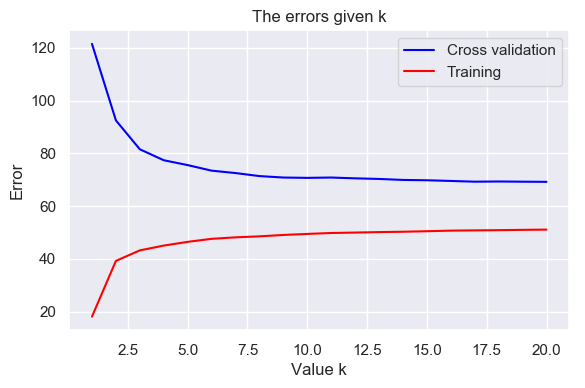

In [22]:
plt.figure(figsize=(5,3), dpi=100)
ax = plt.axes([0,0,1,1])
ax.plot(scores_cv/100, label='Cross validation',color='blue')
ax.plot(score_train, label='Training', color='red')
ax.set(title='The errors given k', xlabel='Value k', ylabel='Error')
plt.legend();

In [23]:
print("For training error, the optimal k is {}".format(score_train.idxmin()))
print("For cross validation error, the optimal k is {}".format(scores_cv.idxmin()))

For training error, the optimal k is 1
For cross validation error, the optimal k is 20


#### Analysis
Based on the plot above, we will choose to have k value of 3 to reach the optimal model. However, the cross validation error is still extremely high (even we scale down the error by dividing it by 100), compare to the training error. Yet, the cross validation error decreases as k increases because the higher k are more likely to include the labels that are close to the true label . On the other hand, the training error increases because higher k is more likely to include outliers that can affect our prediction. Furthermore, both lines become flat quickly as k increases. Since our model is subject to high variance, one way we can reduce the error is to increase the training set.

### Understand the host's and customers' minds
#### Host's WordCloud

In [24]:
# Display the Text DataFrame
text_df.head()

Description                                            Summary Experiences Offered                              Neighborhood Overview                                              Notes
3   Welcome to downtown, simply the best part of M...  Welcome to downtown, simply the best part of M...                none  Best neighborhood in Manhattan for independent...  FREQUENTLY ASKED QUESTIONS Some answers to som...
17  Nice room for three with separated beds (there...  Nice room for three with separated beds (there...                none  It is closest building to the river, outdoor g...  Usually you will be alone, all of us at the jo...
19  This charming studio is spacious and bright! S...  This charming studio is spacious and bright! S...                none  The Lower East Side has so many restaurants, b...                            Neighborhood is lively.
21  Be on the heart of the city.  Subway in the sa...  Be on the heart of the city.  Subway in the sa...                none  When the freelance work is slow, I have no nee...  Right now I am in an art residency where i spe...
24  My place is close to Barrio Chino, Tenement Mu...  My place is close to Barrio Chino, Tenement Mu...                none  The East Village is one of the greatest NYC ne...  I provide linens, dishes, cups, comforters, so...

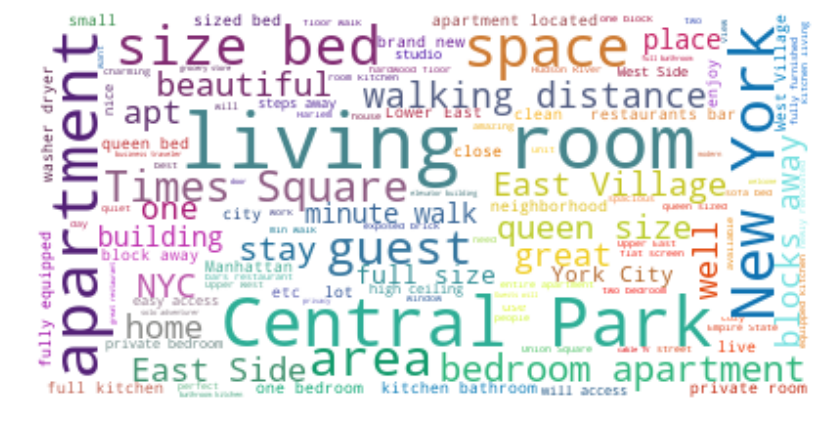

In [25]:
# Create a mask
mask = np.array(Image.open("img/color.jpg"))

# Set a list of stopwords
stopwords = set(STOPWORDS)
stopwords.update(['Subway','Central Park','Comfortable','Expensive'])

# Add all the texts together
host_text = "".join(review for review in text_df['Description'].values)

# Create a WordCloud object
word = WordCloud(max_font_size=40, max_words=len(host_text),background_color='white', stopwords=stopwords).generate(host_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)

# Display the wordcloud and adjust the color
plt.figure(figsize=(14,14))
plt.axis('off')
plt.imshow(word.recolor(color_func=image_colors), interpolation='bilinear');

#### Customers' WordCloud

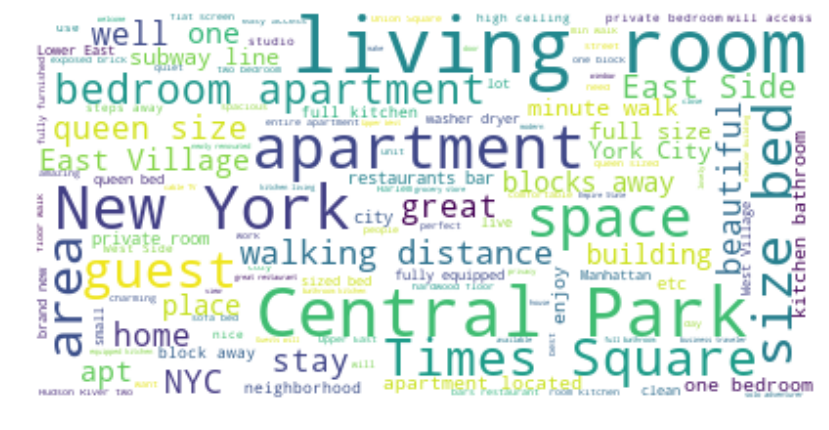

In [26]:
# Join all the text together
customer_text = "".join(review for review in text_df['Notes'].values)

# Create a WordCloud Object
word = WordCloud(max_font_size=40, max_words=len(host_text),background_color='white').generate(host_text)

# Display the wordcloud
plt.figure(figsize=(14,14))
plt.axis('off')
plt.imshow(word, interpolation='bilinear');

#### Analysis
When we look at these colorful wordcloud, we could see that both hosts and customers may have some similar words, such as Central Park, New York City, living room, apartment, or Time Square, and so on. These words are the most common words, according to their size on the wordcloud. Thus, we can imply that hosts are taking customers' reviews seriously and try their best to improve their quality accordingly. Also, the most comon words are the most popular destinations in NYC, which makes sense.

### Compare NYC Dataset with ones of Boston and San Francisco

#### Price

In [27]:
boston_listings['city'] = "Boston"; ny_listings['City'] = "New York City"; san_listings['city'] = "San Francisco"

boston_price = boston_listings[["city",'price']].dropna()
boston_price['price'] = boston_price.apply(lambda x: float(x['price'].replace("$","").replace(",","")), axis=1)
boston_price = boston_price[(0 < boston_price['price']) & (boston_price['price'] < 400)]

nyc_price = ny_listings[['City','Price']].rename(columns={"City":"city","Price":'price'}).dropna()
nyc_price = nyc_price[(nyc_price['price'] > 0) & (nyc_price['price'] < 400)]

san_price = san_listings[['city','price']].dropna()
san_price['price'] = san_price.apply(lambda x: float(x['price'].replace("$","").replace(",","")), axis=1)
san_price = san_price[(0 < san_price['price']) & (san_price['price'] < 400)]

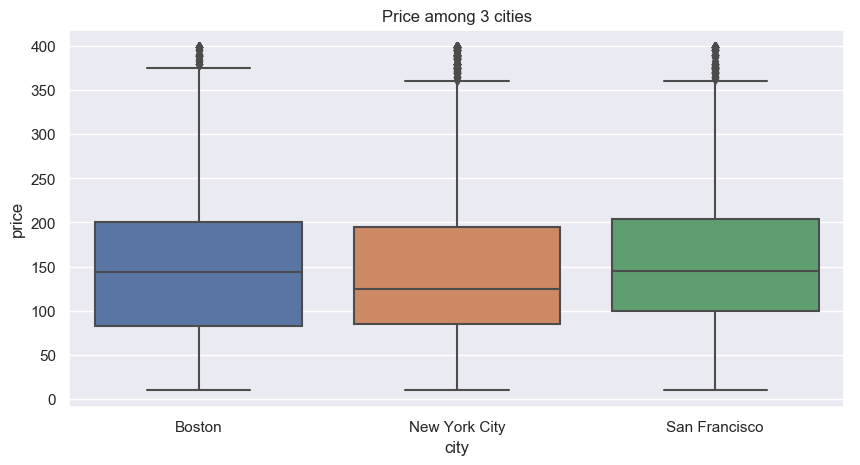

In [28]:
plt.figure(figsize=(10,5), dpi=100)
data = pd.concat([boston_price,nyc_price,san_price])
sb.boxplot(data=data, x='city',y='price')
plt.title("Price among 3 cities");

#### Analysis
To reduce the effect of outliers, we will only analyze the data whose price is in range of 0 to 500 dollars. It seems that the price of three cities are roughly similar to each other. For each city, its median value is approximately 150 dollars, and 75% of its data are in range of 90 to 200 dollars. These prices are considered high, which makes sense since Boston, New York, and San Francisco are ones of the most expensive cities in the world. 

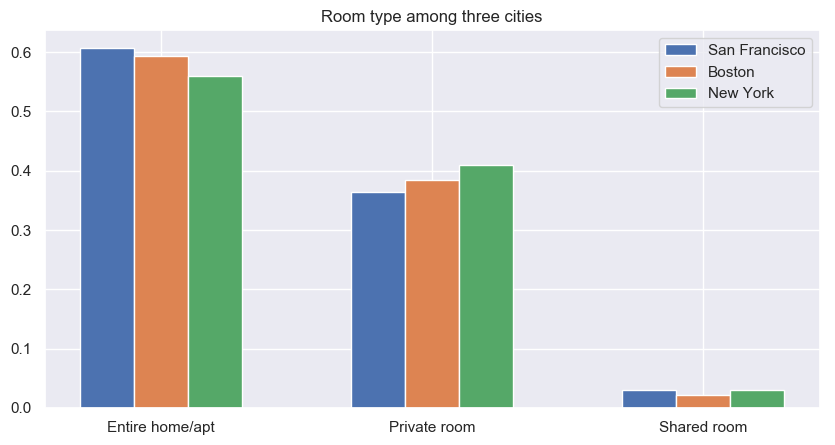

In [29]:
x = np.arange(3)
width = 0.2

san = san_listings['room_type'].value_counts() / len(san_listings)
boston = boston_listings['room_type'].value_counts() / len(boston_listings)
nyc = ny_listings['Room Type'].value_counts() / len(ny_listings)

plt.figure(figsize=(10,5), dpi=100)
plt.bar(x,san.values, width=width, label='San Francisco')
plt.bar(x+width, boston.values, width=width, label='Boston')
plt.bar(x+2*width, nyc.values, width=width, label='New York')

plt.gca().set_xticks(x+width)
plt.gca().set_xticklabels(['Entire home/apt','Private room','Shared room'])
plt.title("Room type among three cities")
plt.legend();

#### Analysis
Since each city has different number of listings, we will compute the percentage of each room type for each city. Once again, the percent of each room of each city is roughly similar to those of other cities. Among three types, entire home/apt has the highest percent, while shared room has the lowest. As we already talked above, it is more profitable for Airbnb owners to lend entire home/apt than other types.

### Policy decision and Conclusion
Through this exploratory data analysis and visualization project, we gained several interesting insights into the Airbnb rental market. Below we will summarise the answers to the questions that we wished to answer at the beginning of the project:

##### Is there any correlation between price and number of reviews, rating scores, host response rate, and average number of rooms?
As I mentioned above, there is postive correlation between price and host response rate, as well as price and average number of rooms. Therefore, possible suggestions for hosts are that they should increase their response rate and renovate their houses such as adding more side beds or utilities in the kitchen. On the other side, rating scores and number of reviews may not have relationship with rental price. Two former features will be included in the training set for Machine Learning model. 

##### What is the price distribution of Airbnb listings in NYC?
The rental distribution can be seen in the boxplot when we compare NYC dataset with others or the first plot of this project. The mean price is 173 dollars, which is similar to those of big cities, such as San Franciso or Boston. The distribution is skewed to the right, which indicates that the mean is higher than the medium.

##### Which locations in NYC have the highest price?
Manhattan has the most expensive rentals compared to the other boroughs. Prices are higher for rentals closer to city hotspots. However, there are a few outliers in Bronx, Staten Island and Brooklyn that defy the above hypothesis.

##### What are the popular room types in NYC?
The most popular room type are Entire home/apt.

##### What times of a year does rental listings increase? Are there any specific holiday seasons that suddenly change the number of listings?
The demand (assuming that it can be inferred from the number of reviews and number of listings) shows a seasonal pattern - demand increases from January to October, then drops slightly in November and December. In general, the demand for Airbnb listings has been steadily increasing over the years.

##### Can we predict the rental price given several features? Which kind of model will we use to do so?
The kNN model is used to fit the training data. After running data visualization, I come up with seven features that are related to the rental price. However, training and test errors are high for this model, which suggests that either the prices of Airbnb apartments are rather arbitrary or there exists other more influential factors that are not included in this dataset. One of my solutions to reduce errors is collecting more training data.

##### What can understand from the customers' reviews? What changes should we execute to make them happier?
As we can see in the two WordCloud, the customers care about the living room, kitchen, transportation, and the location of a house. A possible suggestion for hosts can be that they should pay attention to customers' reviews and make reasonable changes to satisfy them. 

##### How do NYC listings compare to ones of Boston and San Francisco?
In addition to the price we discussed above, NYC's percents of room types are approximately close to those of Boston or San Francisco. This makes sense since Airbnb owners gain the most profit if they lend entire home/apt.

##### Limitations and difficulties
The first obstacle when I dealed with this dataset is that it has a lots of missing data. I had to spend quite much time trying to use the most approriate technique of imputation to fill the missing data, and the solution I used is mean imputation. The second difficulty is finding the suitable library to implement Map. Among Basemap, Folium, and Geopandas, I chose geopandas because it is more convenient and efficient to use since I can map the data by using the DataFrame directly, not having to learn many more complicated syntax. Finally, my current problem is finding a way to reduce the error for Machine Learning model.

##### Outcome
Besides gaining interesting insights into the Airbnb rental market in NYC, I acquired several technical and soft skills along the way. Dealing with multiple data formats helped me strengthen our skills in data manipulation and cleaning. I learned how to work on different Python libraries, particularly Scikit-learn to train Machine Learning model. I also learnt how to effectively deploy Github and other version control systems while working on a project.

##### Future Directions
I want to expand our analysis to multiple cities and compare patterns and trends amongst these cities. From the insights I have derived, I would also like to build predictive models using different features from the dataset. Lastly, I hope to implement the visualizations and techniques used in this project to many other fields and datasets.

##### Similar resources
If you want to know more about NYC Listings and Airbnb, please check out this page in Medium or another project done by Columnbia students.

Resources: 
1. https://medium.com/ml2vec/data-analysis-on-the-airbnb-dataset-e0be9254eeb9
https://towardsdatascience.com/airbnb-rental-listings-dataset-mining-f972ed08ddec
2. http://www.columbia.edu/~sg3637/airbnb_final_analysis.html